In [1]:
import nibabel as nib
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt
import os

In [268]:
# Set your voxel threshold here
VOXEL_THRESHOLD = 75

def get_clusters(img_data, voxel_threshold):
    # Get the unique intensities in the image data (excluding 0)
    unique_intensities = np.unique(img_data)[np.nonzero(np.unique(img_data))]

    # Prepare the result
    result = []

    # Loop over each unique intensity
    for intensity in unique_intensities:
        # Create a binary image where the voxels with the current intensity are 1 and the others are 0
        img_data_binary = img_data == intensity

        # Label each cluster in the binary image
        labeled_array, num_features = ndimage.label(img_data_binary)

        # Get the size of each cluster
        cluster_sizes = ndimage.sum(img_data_binary, labeled_array, range(1, num_features + 1))

        # Get the indexes of clusters that are above the size threshold
        cluster_indexes = np.where(cluster_sizes > voxel_threshold)[0] + 1

        # Loop over each cluster index
        for cluster_index in cluster_indexes:
            # Get the coordinates of the voxels in this cluster
            voxel_coordinates = np.transpose(np.where(labeled_array == cluster_index))

            # Calculate the center of the cluster
            center_of_cluster = np.mean(voxel_coordinates, axis=0)

            # Append the voxel coordinates, center of the cluster, and intensity to the result
            result.append((voxel_coordinates, center_of_cluster, intensity))

    return result

def process_brain_volume(inf_change, rootpath, phenotype):
    # Load the .nii.gz file
    img = nib.load(inf_change)


    # Get the image data as a numpy array
    img_data = img.get_fdata()

    # Get the atlas as a numpy array
    atlas = nib.load("/Users/dkor/fsl/data/atlases/JHU/JHU-ICBM-labels-2mm.nii.gz")
    atlas_data = atlas.get_fdata()
    

    # Get the clusters
    clusters = get_clusters(img_data, VOXEL_THRESHOLD)

    # Print the clusters
    for i, (voxel_coordinates, center_of_cluster, cluster_intensity) in enumerate(clusters, start=1):
        
        parameter = model_names[int(cluster_intensity)]
        
        print(f"Cluster {i} :")
        print(f"Intensity : {int(cluster_intensity)}")
        print(f"Parameter : {parameter}")
        print(f"Center of Cluster (x, y, z): {center_of_cluster}")
        print(f"Cluster size (number of vox): {voxel_coordinates.shape[0]}")
        
        #construct probability and amount nii.gz based on selected parameter
        
        probability = os.path.join(rootpath,phenotype,f"{parameter}_probability_{phenotype}.nii.gz")
        amount = os.path.join(rootpath,phenotype,f"{parameter}_amount_{phenotype}.nii.gz")
       
        prob = nib.load(probability)
        am = nib.load(amount)
        
        prob_data = prob.get_fdata()
        amount_data = am.get_fdata()

        # output the probabilities and amounts for each cluster:
        
        labels = atlas_data[voxel_coordinates[:,0], voxel_coordinates[:,1], voxel_coordinates[:,2]].astype(int)
        
        fig, ax = plt.subplots(1,3, figsize=(15, 4)) 
        plt.suptitle(f"Cluster {i}, parameter {parameter}")
        ax[0].hist(prob_data[voxel_coordinates[:,0], voxel_coordinates[:,1], voxel_coordinates[:,2]],bins=20)
        ax[0].set_title("Prob")
        ax[1].hist(amount_data[voxel_coordinates[:,0], voxel_coordinates[:,1], voxel_coordinates[:,2]],bins=20)
        ax[1].set_title("Amount")
        ax[2].hist(labels,bins=20)
        ax[2].set_title("Label")
        
        #print the tract index with highest count
        counts = np.bincount(labels)
        mode = np.argmax(counts)
        
        print(f"Tract label : {mode} \n")


# Test the script with a .nii.gz file
# process_brain_volume('path_to_your_file.nii.gz')

In [219]:
rootpath='/Users/dkor/OneDrive - Nexus365/UKBB/phenotype_analysis/cardiac_aortic_v2/predictions'

In [220]:
from bench import change_model

ch_mdl = change_model.ChangeModel.load("/Users/dkor/OneDrive - Nexus365/UKBB/change_models/invivo/normalisation_by_baseline/2D_2nd/SM_ball_sphere/watson_stick_zeppelin_sphere_ball_30000_samples_1.7_diff")

model_names = ch_mdl.model_names

Cluster 1 :
Intensity : 7
Parameter : d_a_in
Center of Cluster (x, y, z): [54.08641975 45.50617284 50.45679012]
Cluster size (number of vox: 81
Tract label : 5 

Cluster 2 :
Intensity : 9
Parameter : d_r_ex
Center of Cluster (x, y, z): [35.2        59.16842105 54.51578947]
Cluster size (number of vox: 95
Tract label : 25 



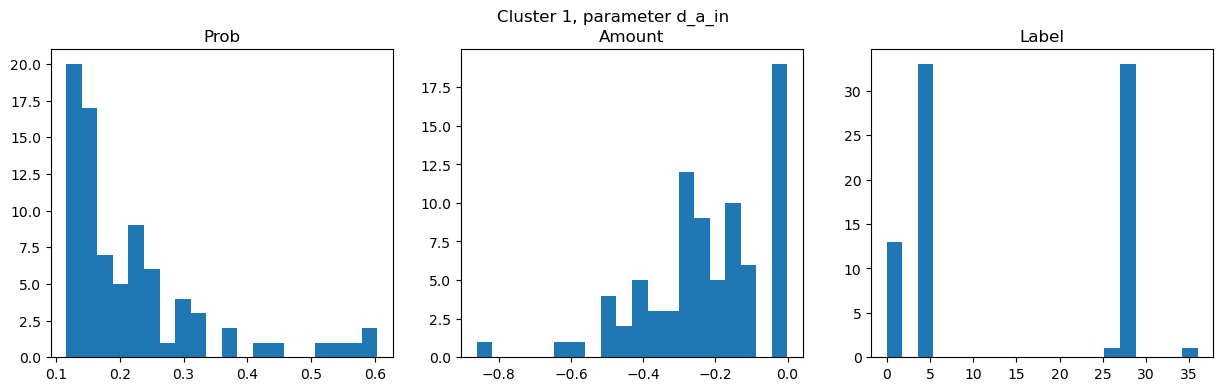

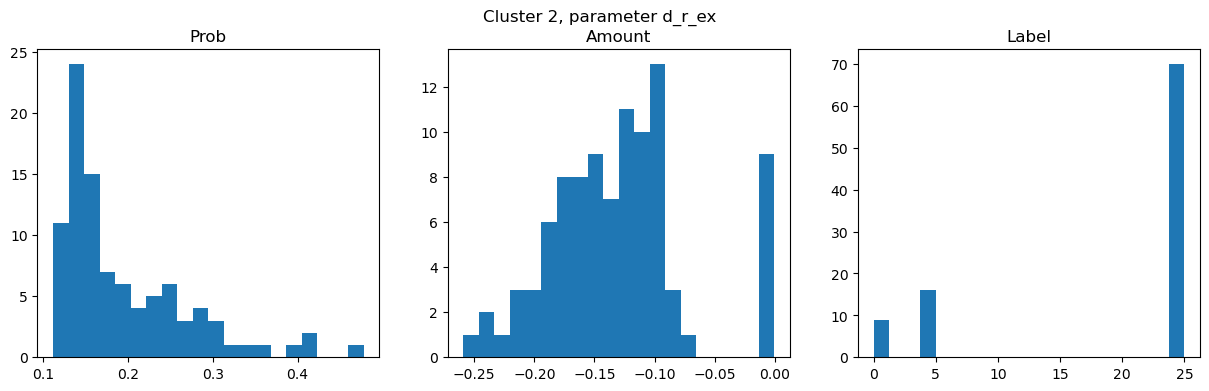

In [222]:
phenotype = 'Descending aorta distensibility (2.0)'
image_data = os.path.join(rootpath, phenotype, f'inferred_change_{phenotype}.nii.gz')
process_brain_volume(image_data, rootpath, phenotype)

In [224]:
phenotype = 'Ascending aorta distensibility (2.0)'
image_data = os.path.join(rootpath, phenotype, f'inferred_change_{phenotype}.nii.gz')
process_brain_volume(image_data, rootpath, phenotype)

In [225]:
phenotype = 'Ascending aorta maximum area (2.0)'
image_data = os.path.join(rootpath, phenotype, f'inferred_change_{phenotype}.nii.gz')
process_brain_volume(image_data, rootpath, phenotype)

Cluster 1 :
Intensity : 5
Parameter : odi
Center of Cluster (x, y, z): [30.32142857 49.58333333 52.73809524]
Cluster size (number of vox): 84
Tract label : 0 



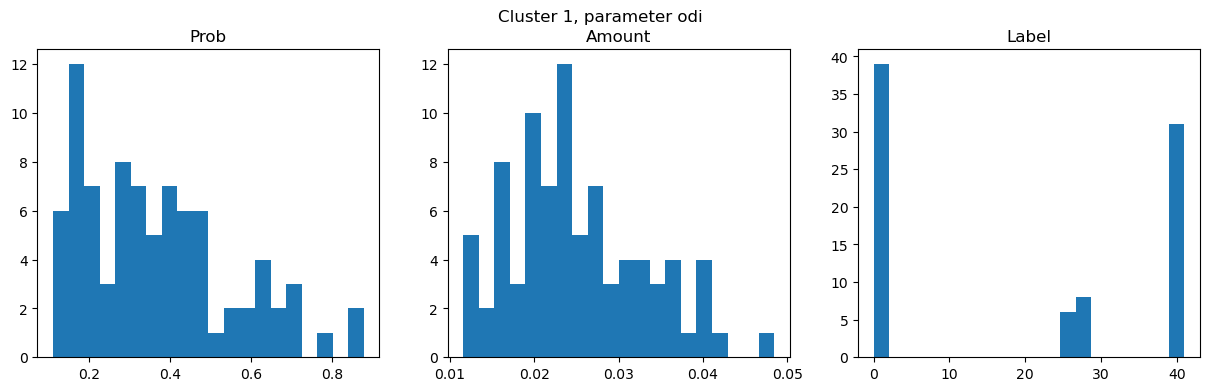

In [226]:
phenotype = 'Descending aorta maximum area (2.0)'
image_data = os.path.join(rootpath, phenotype, f'inferred_change_{phenotype}.nii.gz')
process_brain_volume(image_data, rootpath, phenotype)

Cluster 1 :
Intensity : 5
Parameter : odi
Center of Cluster (x, y, z): [29.75949367 55.73417722 54.62025316]
Cluster size (number of vox): 79
Tract label : 0 



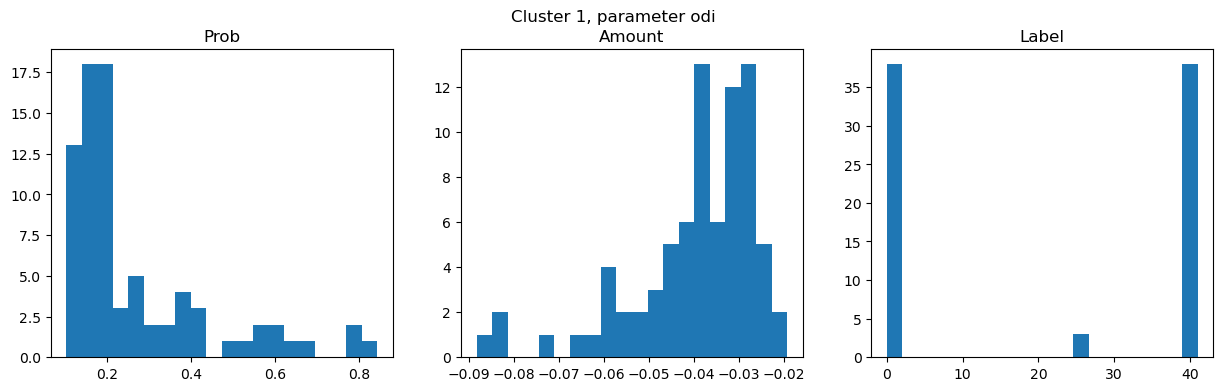

In [227]:
phenotype = 'LA ejection fraction (2.0)'
image_data = os.path.join(rootpath, phenotype, f'inferred_change_{phenotype}.nii.gz')
process_brain_volume(image_data, rootpath, phenotype)

In [228]:
phenotype = 'LV end systolic volume (2.0)'
image_data = os.path.join(rootpath, phenotype, f'inferred_change_{phenotype}.nii.gz')
process_brain_volume(image_data, rootpath, phenotype)

In [229]:
phenotype = 'LV mean myocardial wall thickness AHA 14 (2.0)'
image_data = os.path.join(rootpath, phenotype, f'inferred_change_{phenotype}.nii.gz')
process_brain_volume(image_data, rootpath, phenotype)

Cluster 1 :
Intensity : 5
Parameter : odi
Center of Cluster (x, y, z): [57.29007634 25.70229008 42.98473282]
Cluster size (number of vox): 131
Tract label : 0 



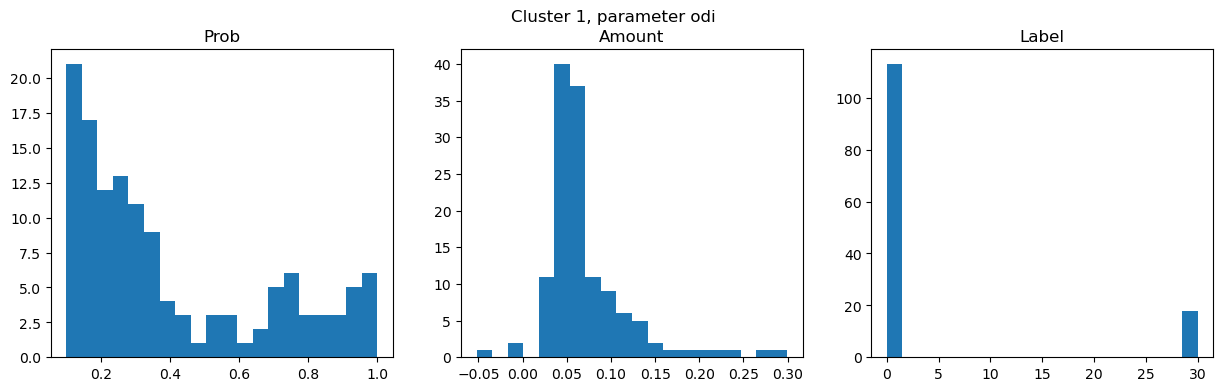

In [230]:
phenotype = 'LV myocardial mass (2.0)'
image_data = os.path.join(rootpath, phenotype, f'inferred_change_{phenotype}.nii.gz')
process_brain_volume(image_data, rootpath, phenotype)

In [247]:
phenotype = 'RV end diastolic volume (2.0)'
image_data = os.path.join(rootpath, phenotype, f'inferred_change_{phenotype}.nii.gz')
process_brain_volume(image_data, rootpath, phenotype)

In [248]:
phenotype = 'LV ejection fraction (2.0)'
image_data = os.path.join(rootpath, phenotype, f'inferred_change_{phenotype}.nii.gz')
process_brain_volume(image_data, rootpath, phenotype)

In [249]:
phenotype = 'LV end diastolic volume (2.0)'
image_data = os.path.join(rootpath, phenotype, f'inferred_change_{phenotype}.nii.gz')
process_brain_volume(image_data, rootpath, phenotype)

Cluster 1 :
Intensity : 5
Parameter : odi
Center of Cluster (x, y, z): [28.5        54.09090909 52.        ]
Cluster size (number of vox): 22
Tract label : 41 

Cluster 2 :
Intensity : 5
Parameter : odi
Center of Cluster (x, y, z): [60.28571429 51.83333333 51.19047619]
Cluster size (number of vox): 42
Tract label : 0 

Cluster 3 :
Intensity : 7
Parameter : d_a_in
Center of Cluster (x, y, z): [28.04545455 39.09090909 46.54545455]
Cluster size (number of vox): 22
Tract label : 0 

Cluster 4 :
Intensity : 7
Parameter : d_a_in
Center of Cluster (x, y, z): [31.56818182 40.34090909 52.5       ]
Cluster size (number of vox): 44
Tract label : 0 

Cluster 5 :
Intensity : 8
Parameter : d_a_ex
Center of Cluster (x, y, z): [54.96296296 24.51851852 41.18518519]
Cluster size (number of vox): 27
Tract label : 0 

Cluster 6 :
Intensity : 9
Parameter : d_r_ex
Center of Cluster (x, y, z): [55.23076923 51.26923077 55.61538462]
Cluster size (number of vox): 26
Tract label : 26 

Cluster 7 :
Intensity : 13

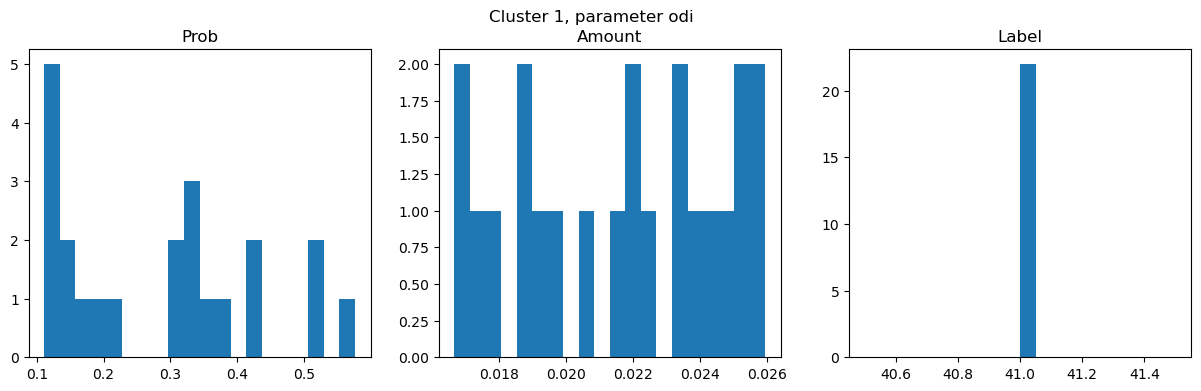

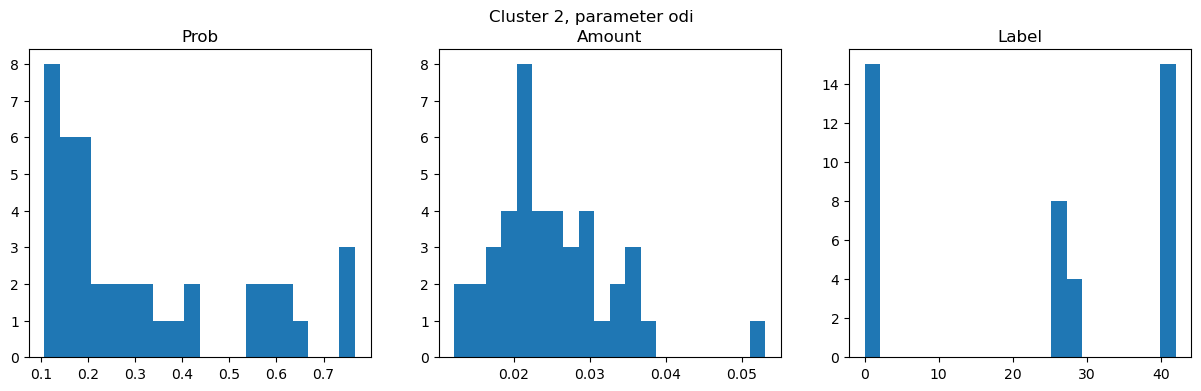

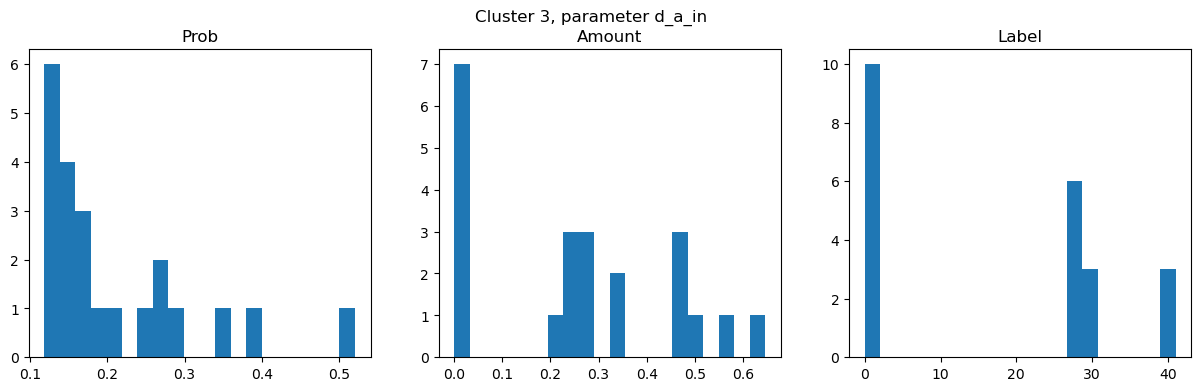

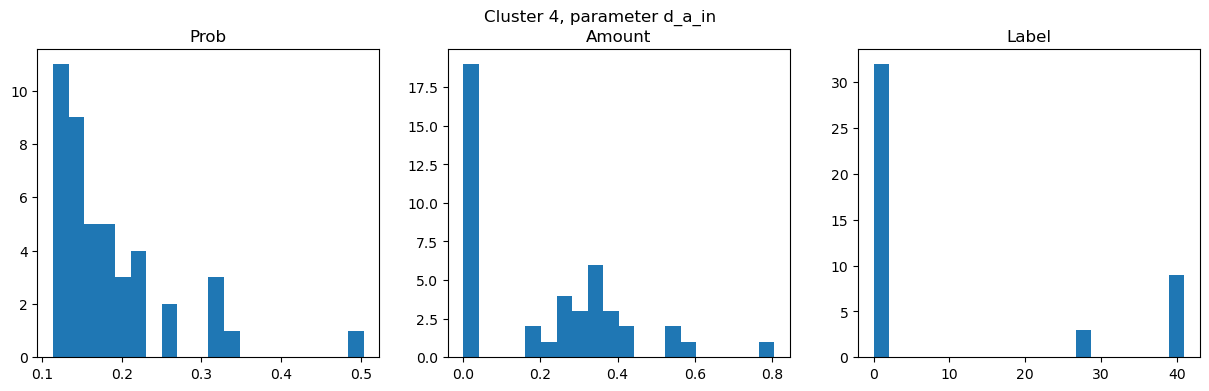

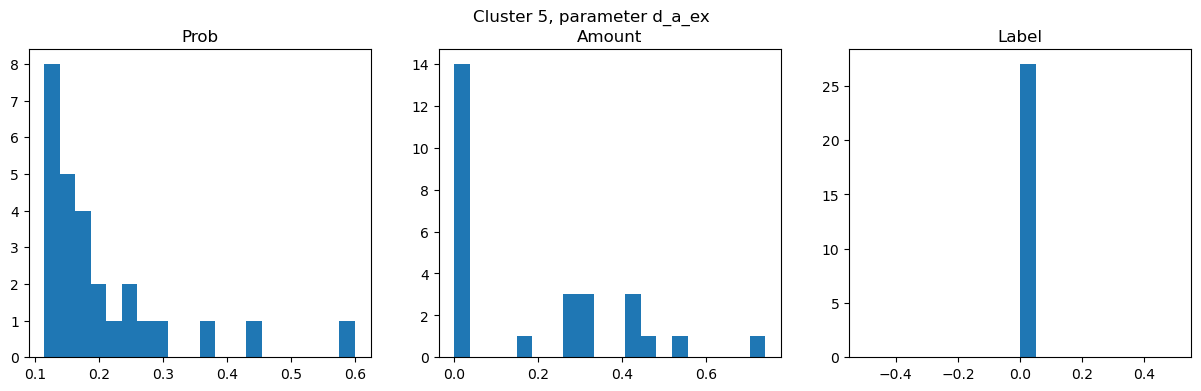

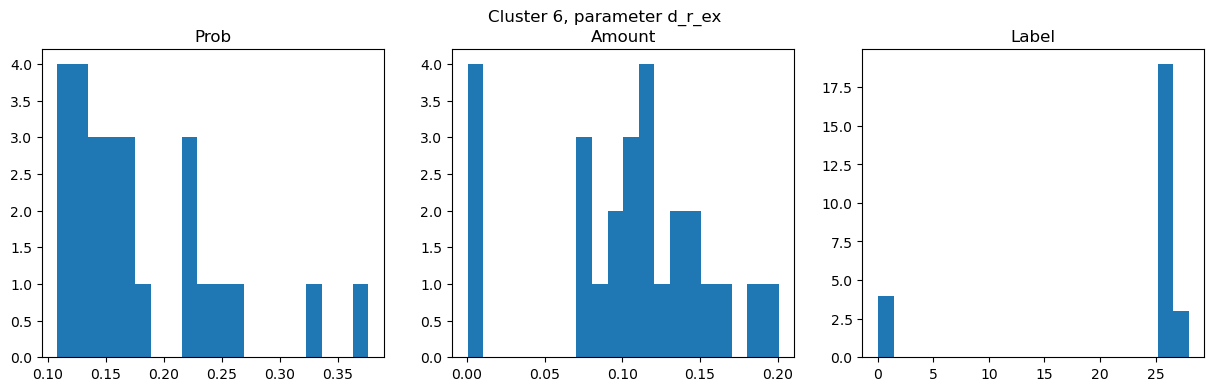

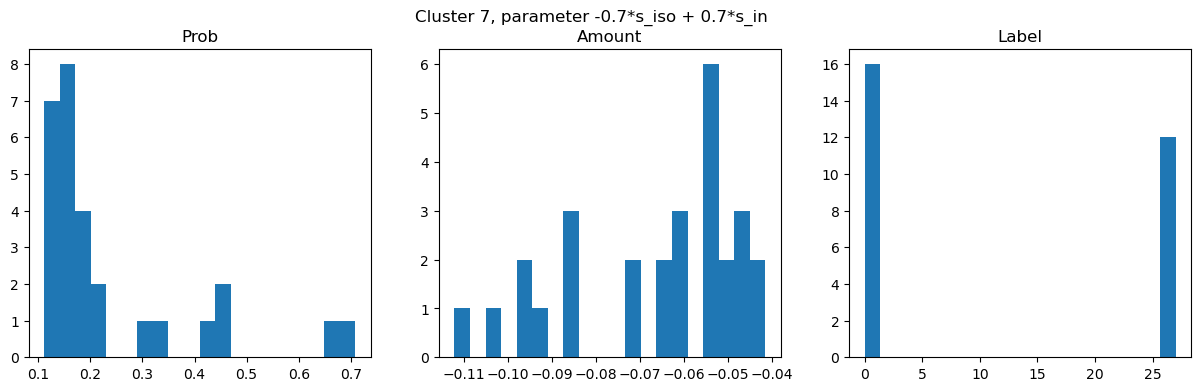

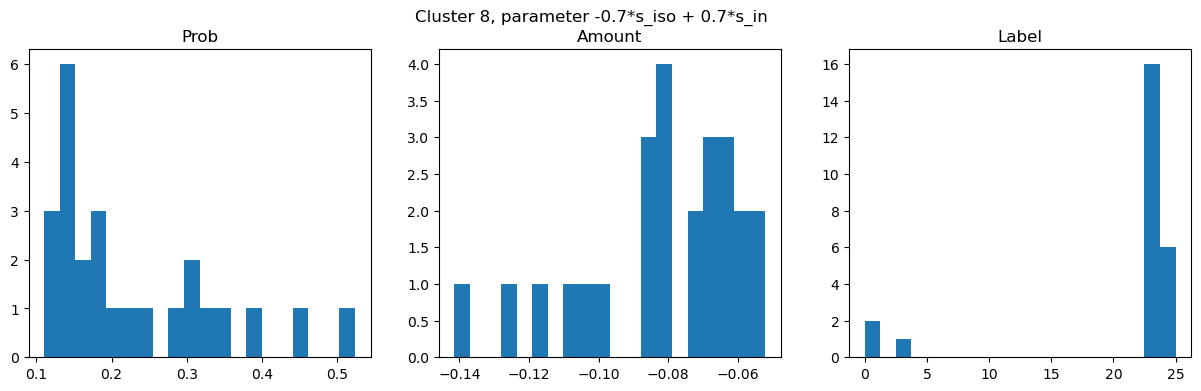

In [267]:
phenotype = 'LV cardiac output (2.0)'
image_data = os.path.join(rootpath, phenotype, f'inferred_change_{phenotype}.nii.gz')
process_brain_volume(image_data, rootpath, phenotype)